<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer folloing questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [4]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

**Original model**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [6]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 49ms/step - loss: 0.5192 - accuracy: 0.7775 - val_loss: 0.4014 - val_accuracy: 0.8539
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3021 - accuracy: 0.9007 - val_loss: 0.3110 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2209 - accuracy: 0.9281 - val_loss: 0.2778 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1705 - accuracy: 0.9435 - val_loss: 0.3066 - val_accuracy: 0.8787
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1393 - accuracy: 0.9551 - val_loss: 0.2860 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1149 - accuracy: 0.9647 - val_loss: 0.3140 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0951 - accuracy: 0.9697 - val_loss: 0.3123 - val_accuracy: 0.8840
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [9]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [19]:
x_val.shape

(10000, 10000)

In [23]:
x_val

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]])

In [24]:
y_val

array([1., 0., 0., ..., 1., 0., 0.], dtype=float32)

In [20]:
y_val.shape

(10000,)

In [16]:
#model2.compile()

model2.compile(optimizer = "rmsprop",
               loss = "categorical_crossentropy",
               metrics = ["accuracy"])



#model2.fit()

history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))


Epoch 1/20


ValueError: ignored

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

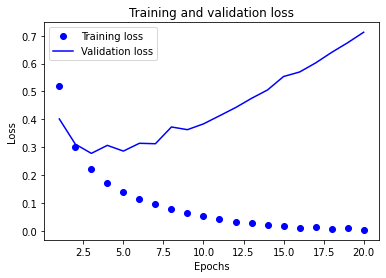

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [14]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model

model2_dr.compile(optimizer = "rmsprop",
                  loss = "binary_crossentropy",
                  metrics = ["accuracy"])

history_dropout = model2_dr.fit(partial_x_train,
                                partial_y_train,
                                epochs = 20,
                                batch_size = 512, validation_data = (x_val, y_val))


# history = model.fit(partial_x_train,
#                     partial_y_train,
#                     epochs = 20,
#                     batch_size = 512,
#                     validation_data = (x_val, y_val))


Epoch 1/20


ValueError: ignored

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [ ]:
## Add l1 regularization on the second dense layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.